In [5]:
import numpy as np
import pandas as pd
from glob import glob
# merge csv files
def merge_files(SOURCE):
    files_list = sorted(glob(SOURCE + '\*'))
    df_list = []
    for num, path in enumerate(files_list):
        df = pd.read_csv(path)
        df = df.drop(['business_id','city','date','state','postal_code','review_count','attributes','name','latitude','longitude','attributes','review_count','address','user_id','text_length'], axis=1)
        df_list.append(df)
    df = pd.concat(df_list, join='outer', ignore_index=True, axis=0, sort=True)
    return df

SOURCE = 'files_yelp'
yelp = merge_files(SOURCE)
yelp = yelp.drop(['stars'], axis=1)
print(yelp.shape)
yelp.head()

(64109, 3)


categories  review_stars  \
0  Karate, Active Life, Gyms, Martial Arts, Fitne...             1   
1  Karate, Active Life, Gyms, Martial Arts, Fitne...             5   
2  Karate, Active Life, Gyms, Martial Arts, Fitne...             1   
3  Karate, Active Life, Gyms, Martial Arts, Fitne...             5   
4  Karate, Active Life, Gyms, Martial Arts, Fitne...             5   

                                                text  
0  While Sensei Joe is a genuinely good person an...  
1  My daughter joined about 5 months ago and she ...  
2  I had high hopes when I started taking the kic...  
3  Sensei Joe is a Karate-Geek, and I mean that i...  
4  I have been working out on my own for a very l...

In [6]:
Fitness_yelp = yelp[yelp['categories'].str.contains('Fitness')]
print(Fitness_yelp.shape)
Fitness_yelp.head()

(64109, 3)


categories  review_stars  \
0  Karate, Active Life, Gyms, Martial Arts, Fitne...             1   
1  Karate, Active Life, Gyms, Martial Arts, Fitne...             5   
2  Karate, Active Life, Gyms, Martial Arts, Fitne...             1   
3  Karate, Active Life, Gyms, Martial Arts, Fitne...             5   
4  Karate, Active Life, Gyms, Martial Arts, Fitne...             5   

                                                text  
0  While Sensei Joe is a genuinely good person an...  
1  My daughter joined about 5 months ago and she ...  
2  I had high hopes when I started taking the kic...  
3  Sensei Joe is a Karate-Geek, and I mean that i...  
4  I have been working out on my own for a very l...

Text(0, 0.5, 'Reviews of Fitness')

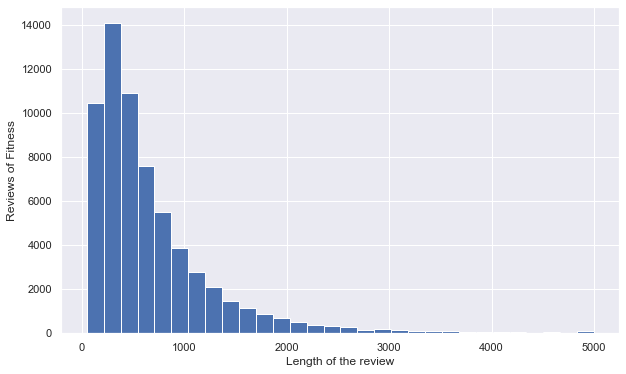

In [7]:
import matplotlib.pyplot as plt
import seaborn


plt.rc('figure', figsize=(10,6))
seaborn.set()
colors = seaborn.color_palette()
Fitness_yelp.text.dropna().str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')
plt.ylabel('Reviews of Fitness')

In [6]:
sorted(Fitness_yelp['review_stars'].unique())

[1, 2, 3, 4, 5]

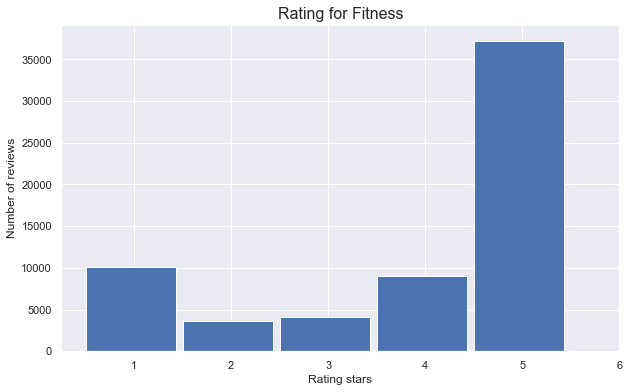

In [7]:
bins = [1 ,2 ,3 ,4, 5, 6]
Fitness_yelp.review_stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.title("Rating for Fitness", fontsize=16)
plt.show()

In [8]:
#Average Rating of Fitness
ratings = list(Fitness_yelp['review_stars'])
print("Average Rating of Fitness is:",sum(ratings)/len(ratings))

Average Rating of Fitness is: 3.9311641111232434


In [9]:
#average length of reviews
totalreviews = list(Fitness_yelp['text'])
length = []
for i in range(0,len(totalreviews)):
        totalreviews[i] = str(totalreviews[i])
        a = len(totalreviews[i].split(' '))
        length.append(a)

    
print("On average a review length of Fitness has about:", sum(length)/len(length))

On average a review length of Fitness has about: 126.48910449390881


In [10]:
#total reviews number
len(length)

64109

In [11]:
Fitness_yelp['length'] =  length
Fitness_yelp['ratings'] =  ratings
five_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 5,:]
five = sum(five_star['length'])/len(five_star['length'])
four_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 4,:]
four = sum(four_star['length'])/len(four_star['length'])
three_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 3,:]
three = sum(three_star['length'])/len(three_star['length'])
two_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 2,:]
two = sum(two_star['length'])/len(two_star['length'])
one_star = Fitness_yelp.loc[Fitness_yelp['ratings'] == 1,:]
one = sum(one_star['length'])/len(one_star['length'])

In [12]:
print("five:",five,"four:",four,"three:",three,"two:",two,"one:",one)

five: 103.93246000214754 four: 141.92401417811254 three: 165.00341963849536 two: 171.38992845349478 one: 164.1177111177111


In [13]:
#5 star has the shortest review length, 2 star has the longest

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


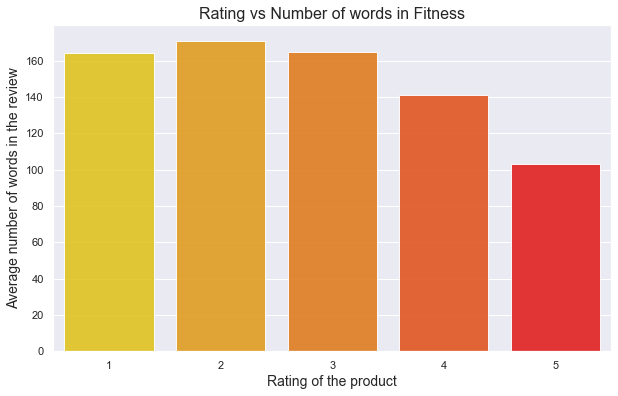

In [14]:
colors = ['#ffd900', '#ffa600','#ff7b00', '#ff4800', '#ff0000']
seaborn.set_palette(seaborn.color_palette(colors))
top = ['1','2','3','4','5']
value = [int(one), int(two),int(three),int(four),int(five)]
seaborn.barplot(top, value, alpha=0.9)
plt.xlabel('Rating of the product', fontsize=14)
plt.ylabel('Average number of words in the review', fontsize=14)
plt.title("Rating vs Number of words in Fitness", fontsize=16)
plt.show()

# Baseline

In [15]:
#The simplest baseline for each of these predictive tasks is a model that always predicts the most common rating.
Fitness_yelp['baseline_rating'] = 5

print("Baseline of rating Fitness = 5" )

Baseline of rating Fitness = 5


In [16]:
t = Fitness_yelp[['review_stars', 'baseline_rating']].dropna(how='any')

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


precision = metrics.precision_score(t.review_stars, t.baseline_rating, average='macro')
recall = metrics.recall_score(t.review_stars, t.baseline_rating, average='macro')
f1 = metrics.f1_score(t.review_stars, t.baseline_rating, average='macro')
accuracy = accuracy_score(t.review_stars, t.baseline_rating)

baselineResult = {}

data = {'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'accuracy':accuracy}

baselineResult['Baseline of Fitness'] = data
pd.DataFrame(baselineResult).T

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy  f1_score  precision  recall
Baseline of Fitness  0.581073  0.147007   0.116215     0.2

# ________________________________________

In [8]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
# Term frequency (TF) - Inverse Document Frequency (IDF)

In [15]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
rfr = RandomForestRegressor(warm_start=True, criterion= 'mse', n_estimators=300, oob_score=True, verbose=2, n_jobs=4)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

# from here train_test_split
from here

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Fitness_yelp['text'].values.astype('U'), Fitness_yelp['review_stars'], test_size=0.3, random_state=1)

In [17]:
pipe_Fitness = Pipeline([('vect', vect), ('rfr', rfr)])

In [18]:
pipe_Fitness.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300building tree 4 of 300

building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  6.6min


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 27.9min


building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed: 54.0min finished


Pipeline(steps=[('vect', TfidfVectorizer(stop_words='english')),
                ('rfr',
                 RandomForestRegressor(n_estimators=300, n_jobs=4,
                                       oob_score=True, verbose=2,
                                       warm_start=True))])

In [19]:
y_pred=pipe_Fitness.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.7s finished


In [20]:
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
#regression

In [21]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import sklearn.metrics as metrics

In [22]:
#If True returns MSE value
# final run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('RandomforestRegression')
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

RandomforestRegression
Mean Absolute Error: 0.58
Mean Squared Error: 0.81
Root Mean Squared Error: 0.9
R-squared scores: 0.65


In [39]:
#If True returns MSE value
# 3rd run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('RandomforestRegression')
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

RandomforestRegression
Mean Absolute Error: 0.58
Mean Squared Error: 0.81
Root Mean Squared Error: 0.9
R-squared scores: 0.65


In [14]:
#If True returns MSE value
# 4th run
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('RandomforestRegression of n=500')
print('Mean Absolute Error:', round(mae, 3))
print('Mean Squared Error:', round(mse, 3))
print('Root Mean Squared Error:', round(rmse, 3))
print('R-squared scores:', round(r2, 3))

RandomforestRegression of n=500
Mean Absolute Error: 0.584
Mean Squared Error: 0.808
Root Mean Squared Error: 0.899
R-squared scores: 0.647


In [15]:
#Return the coefficient of determination R^2 of the prediction.
#4th run
pipe_Fitness.score(Fitness_yelp['text'].values.astype('U'), Fitness_yelp['review_stars'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    4.8s finished


0.8606249654956958

In [20]:
#Return the coefficient of determination R^2 of the prediction.
#third run
pipe_Fitness.score(Fitness_yelp['text'].values.astype('U'), Fitness_yelp['review_stars'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    2.7s finished


0.8605395415394025

In [21]:
#third run

error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})
error2.head(20) #try for linear

Actual-Values  Predicted-Values
0               4          4.583333
1               5          4.973333
2               3          3.643333
3               5          4.646667
4               3          3.023333
5               3          3.236667
6               5          4.886667
7               5          4.923333
8               5          4.153333
9               1          1.536667
10              5          4.416667
11              5          4.900000
12              5          4.813333
13              1          1.190000
14              5          3.113333
15              5          4.876667
16              5          4.826667
17              5          3.710000
18              5          4.563333
19              5          4.663333

In [34]:
error2.head(30)

Actual-Values  Predicted-Values
0               4          4.583333
1               5          4.973333
2               3          3.643333
3               5          4.646667
4               3          3.023333
5               3          3.236667
6               5          4.886667
7               5          4.923333
8               5          4.153333
9               1          1.536667
10              5          4.416667
11              5          4.900000
12              5          4.813333
13              1          1.190000
14              5          3.113333
15              5          4.876667
16              5          4.826667
17              5          3.710000
18              5          4.563333
19              5          4.663333
20              5          3.116667
21              4          3.183333
22              5          4.510000
23              5          4.963333
24              5          4.836667
25              5          4.936667
26              1          2.176667
27              5          4.933333
28              1          2.650000
29              5          4.756667

In [22]:
#n=500
error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})

error2.head(30)

Actual-Values  Predicted-Values
0               4             4.724
1               5             4.928
2               3             3.662
3               5             4.578
4               3             2.986
5               3             3.298
6               5             4.906
7               5             4.942
8               5             4.002
9               1             1.484
10              5             4.396
11              5             4.904
12              5             4.870
13              1             1.206
14              5             3.178
15              5             4.838
16              5             4.840
17              5             3.634
18              5             4.578
19              5             4.584
20              5             3.076
21              4             3.056
22              5             4.460
23              5             4.954
24              5             4.698
25              5             4.944
26              1             2.490
27              5             4.924
28              1             2.696
29              5             4.748

In [19]:
print('number of feature:', rfr.n_features_, 'number of ')


number of feature: 46135 number of 


In [20]:
rfr.oob_score_

0.6491598263246916

In [23]:
rfr.oob_score_

0.6489227614541135

In [24]:
rfr.oob_prediction_

array([4.94      , 3.18095238, 4.99152542, ..., 1.24299065, 2.44166667,
       3.15517241])

In [30]:
# Use sklearn to export the tree 
from sklearn.tree import export_graphviz
from sklearn import tree


#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.export_graphviz(rfr.estimators_[0], out_file='tree.dot')
(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('tree.png');

DecisionTreeRegressor()

In [40]:

# Use sklearn to export the tree 
from sklearn.tree import export_graphviz
from sklearn import tree


fig, axes = plt.subplots(figsize = (12,12), dpi=2000)
tree.plot_tree(rfr.estimators_[0], rounded=True, );
fig.savefig('fitness_rfr8.png')

In [ ]:

# Use sklearn to export the tree 
from sklearn.tree import export_graphviz
from sklearn import tree


fig, axes = plt.subplots(figsize = (14,14), dpi=2400)
tree.plot_tree(rfr.estimators_[0], rounded=True, );
fig.savefig('fitness_rfr9.png')

In [33]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Fitness.predict(my_review)[0]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished


4.723333333333334

In [37]:
import pickle
pickle.dump(pipe_Fitness, open('Fitness_yelp_review_predict_star.pkl', 'wb'))

In [28]:
#If True returns MSE value

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.58
Mean Squared Error: 0.81
Root Mean Squared Error: 0.9
R-squared scores: 0.65


In [29]:
#if False returns RMSE value.
mean_squared_error(y_test, y_pred, squared=False)

0.899756493098895

In [36]:
#If True returns MSE value
#second run

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('Root Mean Squared Error:', round(rmse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 0.62
Mean Squared Error: 0.96
Root Mean Squared Error: 0.98
R-squared scores: 0.71


In [30]:
#Return the coefficient of determination R^2 of the prediction.
#second run
pipe_Fitness.score(Fitness_yelp['text'].values.astype('U'), Fitness_yelp['review_stars'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    2.5s finished


0.8600915386180191

In [31]:
#second run

error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})
error2.head(20) #try for linear

Actual-Values  Predicted-Values
0               4          4.650000
1               5          4.970000
2               3          3.656667
3               5          4.553333
4               3          2.963333
5               3          3.403333
6               5          4.910000
7               5          4.930000
8               5          3.906667
9               1          1.553333
10              5          4.313333
11              5          4.920000
12              5          4.823333
13              1          1.193333
14              5          3.140000
15              5          4.856667
16              5          4.836667
17              5          3.363333
18              5          4.546667
19              5          4.653333

In [45]:
from sklearn.model_selection import KFold, GridSearchCV,  cross_val_score
kf = KFold(n_splits=5)
cv_score = cross_val_score(rfr, X_train, y_train, scoring='r2', cv=kf)
cv_score

c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\_forest.py", line 304, in fit
    accept_sparse="csc", dtype=DTYPE)
  File "c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\users\wang\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "c:\users\wang\appdata\local\pr

array([nan, nan, nan, nan, nan])

In [56]:
error2 = pd.DataFrame({'Actual-Values': np.array(y_test).flatten(), 'Predicted-Values': y_pred.flatten()})
error2.head(20) #try for linear

Actual-Values  Predicted-Values
0               2          2.106667
1               1          1.296667
2               5          5.000000
3               3          1.900000
4               1          3.050000
5               5          4.333333
6               1          1.203333
7               1          1.860000
8               5          4.996667
9               2          1.126667
10              5          4.960000
11              5          4.823333
12              5          4.296667
13              5          4.036667
14              5          4.920000
15              1          2.500000
16              5          4.926667
17              5          4.953333
18              4          2.973333
19              1          1.906667

In [54]:
#Return the coefficient of determination R^2 of the prediction.
pipe_Fitness.score(Fitness_yelp['text'].values.astype('U'), Fitness_yelp['review_stars'])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    5.4s finished


0.8860746509529605

In [33]:
rfr.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=1898849844),
 DecisionTreeRegressor(max_features='auto', random_state=2082385777),
 DecisionTreeRegressor(max_features='auto', random_state=1080632922),
 DecisionTreeRegressor(max_features='auto', random_state=411659952),
 DecisionTreeRegressor(max_features='auto', random_state=1998797239),
 DecisionTreeRegressor(max_features='auto', random_state=1910000599),
 DecisionTreeRegressor(max_features='auto', random_state=452813945),
 DecisionTreeRegressor(max_features='auto', random_state=1587899436),
 DecisionTreeRegressor(max_features='auto', random_state=1801629521),
 DecisionTreeRegressor(max_features='auto', random_state=1554651436),
 DecisionTreeRegressor(max_features='auto', random_state=1030205109),
 DecisionTreeRegressor(max_features='auto', random_state=1184969925),
 DecisionTreeRegressor(max_features='auto', random_state=382895323),
 DecisionTreeRegressor(max_features='auto', random_state=1230934863),
 DecisionTreeRegressor(

In [27]:
#support is the number of the reviews in this test size (y_test) 89300*0.3=26790
print('\t\tCLASSIFICATIION METRICS for Fitness\n')
print(metrics.classification_report(y_test, y_pred))

		CLASSIFICATIION METRICS for Doctors

              precision    recall  f1-score   support

           1       0.78      0.93      0.85     10696
           2       0.70      0.01      0.02      1766
           3       0.53      0.01      0.01      1100
           4       0.54      0.00      0.01      2013
           5       0.84      0.97      0.90     17029

    accuracy                           0.81     32604
   macro avg       0.68      0.38      0.36     32604
weighted avg       0.78      0.81      0.75     32604



In [28]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 9970     3     2     2   719]
 [ 1406    14     3     1   342]
 [  597     3     8     0   492]
 [  309     0     0     7  1697]
 [  494     0     2     3 16530]]


In [29]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 9970,     3,     2,     2,   719],
       [ 1406,    14,     3,     1,   342],
       [  597,     3,     8,     0,   492],
       [  309,     0,     0,     7,  1697],
       [  494,     0,     2,     3, 16530]], dtype=int64)

In [30]:
metrics.accuracy_score(y_test,y_pred)

0.8136731689363268

# 3. Training Model

In [17]:
#Before you train the model, make sure clear the train_test_split
#you can training the model without the train_test_split
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer 
# Term frequency (TF) - Inverse Document Frequency (IDF)


In [19]:
# Instances for pipeline
#verbose = to show progress, higher number show more details
#n_jobs = n of process running in parallelly
rfr = RandomForestRegressor(warm_start=True, n_estimators=300, oob_score=True, verbose=2, n_jobs=6)
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,1),encoding='utf-8')

In [ ]:
# Specify the pipeline
pipe_Fitness = Pipeline([('vect', vect), ('rfr', rfr)])
#or we can just set test_size=1 from train_test_split
pipe_Fitness.fit(Fitness_yelp['text'].values.astype('U'), Fitness_yelp['review_stars'])

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200

building tree 6 of 200


In [7]:
import pickle
pickle.dump(pipe_Fitness, open('Fitness_yelp_review_predict_star.pkl', 'wb'))

In [8]:
my_review = ["I already knew App Academy would be tough before I applied, but I never would've thought it was the most difficult experience I had ever imagine. As someone with no prior coding experience, I would say the first few weeks were really hard on me and it doesn't get easier. Eventually, it's something that everyone gets accustomed to. Before I knew it, it was 3 months already and I can finally tell people that I'm a software developer.To sum things up, App Academy is harder than anything you imagined, but it will also be the most rewarding experience in your life."]
pipe_Fitness.predict(my_review)[0]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished


5